### Student Name: Nick Marshall

In [1]:
#TODO: import the modules
import pandas as pd
import matplotlib.pyplot as plt
import datetime
from sklearn.feature_selection import RFE, SelectKBest
from sklearn import svm
from sklearn import preprocessing
from sklearn.feature_selection import chi2, f_classif 
from sklearn.preprocessing import MinMaxScaler

### Step 1 - Load the data

<AxesSubplot:>

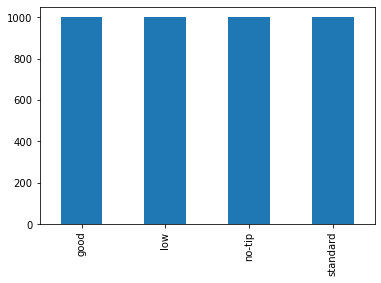

In [2]:
sample_size = 1000
file_path   = 'trip_data.csv' #TODO: provide the file path or URL to the dataset `trip_data.csv`

df = pd.read_csv(file_path)
df = df.groupby('tip').apply(lambda x: x.sample(sample_size))
df = df.sample(frac=1) #shuffle the dataframe rows

#visualize the sample data, which contain 1000 observations from each class
df.tip.value_counts().sort_index().plot.bar()

In [3]:
df.dtypes

VendorID                 float64
lpep_pickup_datetime      object
lpep_dropoff_datetime     object
RatecodeID               float64
PULocationID               int64
DOLocationID               int64
passenger_count          float64
trip_distance            float64
fare_amount              float64
extra                    float64
mta_tax                  float64
tolls_amount             float64
improvement_surcharge    float64
total_amount             float64
trip_type                float64
congestion_surcharge     float64
tip                       object
dtype: object

In [4]:
df.head

<bound method NDFrame.head of                  VendorID lpep_pickup_datetime lpep_dropoff_datetime  \
tip                                                                    
standard 50820        2.0  2019-12-09 14:49:12   2019-12-09 14:56:47   
low      140578       1.0  2019-12-24 12:50:32   2019-12-24 13:03:34   
         5705         2.0  2019-12-02 09:37:47   2019-12-02 09:46:00   
good     35472        2.0  2019-12-06 21:36:45   2019-12-06 21:39:47   
         44611        2.0  2019-12-08 09:04:37   2019-12-08 09:09:13   
...                   ...                  ...                   ...   
no-tip   18998        1.0  2019-12-04 13:37:30   2019-12-04 14:09:03   
standard 122263       2.0  2019-12-20 17:47:02   2019-12-20 18:04:10   
low      89546        2.0  2019-12-15 13:56:31   2019-12-15 14:08:21   
good     116132       2.0  2019-12-19 18:21:08   2019-12-19 19:07:29   
low      1091         2.0  2019-12-01 10:02:36   2019-12-01 10:16:21   

                 RatecodeID  PULo

### Step 2: Create a new feature called `trip_duration`

In [5]:
#Create a new feature called trip_duration and add it to the dataframe

#TODO: Calculate the difference between `lpep_pickup_datetime` and `lpep_dropoff_datetime` in seconds (this should be a positive number).
df['lpep_dropoff_datetime_s'] = df['lpep_dropoff_datetime'].apply(lambda x: datetime.datetime.strptime(x, '%Y-%m-%d %H:%M:%S').timestamp())
df['lpep_pickup_datetime_s'] = df['lpep_pickup_datetime'].apply(lambda x: datetime.datetime.strptime(x, '%Y-%m-%d %H:%M:%S').timestamp())
                                                                                                     
df['trip_duration'] = df['lpep_dropoff_datetime_s'] - df['lpep_pickup_datetime_s']  #TODO: store the elapsed time (from above) into the dataframe.

df.head()

#Remove the `lpep_pickup_datetime` and `lpep_dropoff_datetime` from the dataframe.
del df['lpep_dropoff_datetime']
del df['lpep_pickup_datetime']
del df['lpep_dropoff_datetime_s']
del df['lpep_pickup_datetime_s']

### Step 3: Encode the labels in the `tip` field.
Use the [LabelEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html) in scikit learn.

In [6]:
#Encode the class labels

#TODO: Initialize the `LabelEncoder`
le = preprocessing.LabelEncoder()

#TODO: Fit the `LabelEncoder` to the class labels in the 'tip' field
le.fit(df['tip'])
le.classes_
#TODO: Use the `LabelEncoder` to encode class labels in the 'tip' field.
df['tip'] = le.transform(df['tip'])
#TODO: Display the encoded labels
df['tip']

tip             
standard  50820     3
low       140578    1
          5705      1
good      35472     0
          44611     0
                   ..
no-tip    18998     2
standard  122263    3
low       89546     1
good      116132    0
low       1091      1
Name: tip, Length: 4000, dtype: int32

Question from student: Why are we seemingly ignoring the ordinal nature of these categories?

In [7]:
df.columns

Index(['VendorID', 'RatecodeID', 'PULocationID', 'DOLocationID',
       'passenger_count', 'trip_distance', 'fare_amount', 'extra', 'mta_tax',
       'tolls_amount', 'improvement_surcharge', 'total_amount', 'trip_type',
       'congestion_surcharge', 'tip', 'trip_duration'],
      dtype='object')

In [8]:
#assign the input features and the class labels to variables 'X' and 'y' respectively.

features = [ 'RatecodeID', 'PULocationID', 'DOLocationID',
       'passenger_count', 'trip_distance', 'fare_amount', 'extra', 'mta_tax',
       'tolls_amount', 'improvement_surcharge', 'total_amount', 'trip_type',
       'congestion_surcharge', 'trip_duration']
X = df[features]
#TODO: assign the input features (in the dataframe) to a variable 'X'.



y = df['tip']
#TODO: assign the encoded labels to a variale 'y'.

### Step 4: Feature selection

#### Filter Methods

[Univariate feature selection](https://scikit-learn.org/stable/modules/feature_selection.html#univariate-feature-selection): use [SelectKBest](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html#sklearn.feature_selection.SelectKBest) to select the seven highest scoring features (i.e. k=7).

In [9]:
#Univariate feature selection using SelectKBest.

k_best   = SelectKBest(score_func=chi2, #TODO choose either chi2 or f_classif
                     k=7#TODO: enter the value for k
                    )

k_best   = k_best.fit(X, y)

features = k_best.transform(X)


#TODO: display the names of the selected features below
#Had to resort to stack overflow for this one: https://stackoverflow.com/questions/46927545/get-feature-names-of-selectkbest-function-python/46929321
list(X.columns[k_best.get_support(indices = True)])

['PULocationID',
 'DOLocationID',
 'trip_distance',
 'fare_amount',
 'total_amount',
 'congestion_surcharge',
 'trip_duration']

In [10]:
#Assign result of SelectKBest to a variable for comparison later

results_select_unscaled = list(X.columns[k_best.get_support(indices = True)])

#### Wrapper methods

Identify the top seven features using [Support Vector Machines (SVM)](https://scikit-learn.org/stable/modules/svm.html) and [Recursive feature elimination (RFE)](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html#sklearn.feature_selection.RFE).

Here is an example on using [SVMs for classification](https://scikit-learn.org/stable/modules/svm.html#classification) and [RFE](https://scikit-learn.org/stable/auto_examples/feature_selection/plot_rfe_digits.html#sphx-glr-auto-examples-feature-selection-plot-rfe-digits-py) in scikit-learn.

In [11]:

svm_estimator = svm.SVC(kernel='linear') #initialize the SVM estimator

#TODO: Recursive Feature Elimination
rfe = RFE(estimator=svm_estimator , #TODO: provide the SVM estimator 
          verbose=1, 
          n_features_to_select= 7 #TODO: enter the number of required features
         )

rfe.fit(X, y) #Note: this may take a few minutes to complete




Fitting estimator with 14 features.
Fitting estimator with 13 features.
Fitting estimator with 12 features.
Fitting estimator with 11 features.
Fitting estimator with 10 features.
Fitting estimator with 9 features.
Fitting estimator with 8 features.


RFE(estimator=SVC(kernel='linear'), n_features_to_select=7, verbose=1)

In [12]:
#TODO: display the names of the selected features below
X.columns[rfe.support_]

Index(['fare_amount', 'extra', 'mta_tax', 'tolls_amount', 'total_amount',
       'trip_type', 'congestion_surcharge'],
      dtype='object')

In [13]:
#Assign result of RFE to a variable for comparison later
results_rfe_unscaled = X.columns[rfe.support_]

#### The results
Compare and contrast the selected features from the filter and wrapper methods. 

SelectKBest provides 
'PULocationID',
 'DOLocationID',
 'trip_distance',
 'fare_amount',
 'total_amount',
 'congestion_surcharge',
 'trip_duration'
 
 SVM with RFE provides:
 'fare_amount', 'extra', 'mta_tax', 'tolls_amount', 'total_amount',
       'trip_type', 'congestion_surcharge'
       
SVM with RFE includes in its feature output 'extra' and 'tolls_amount', and 'trip_type', which is ignored by SelectKBest. 

Both models share in common 'congestion_surcharge', 'total_amount', and 'fare amount'.

The results from SelectKBest seem more reasonable overall. Tip would probably be a function of duration and distance of the trip. Location may also play a role, if its related in anyway to class. People from certain locations may feel a pressing nobless oblige to tip. These are admittedly speculations. 


### Step 5: Standardize the input features
Use the [MinMaxScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html#sklearn.preprocessing.MinMaxScaler) in [scikit-learn's preprocessing module](https://scikit-learn.org/stable/modules/preprocessing.html) to scale the input features between 0.1 and 0.9 (i.e. the min and max respectively). 

In [14]:
#Standardize the input features
scaler = MinMaxScaler(feature_range=(0.1, 0.9) #TODO: provide the min and max values for the features
                     )

X_scaled = scaler.fit_transform(X)

In [15]:
#TODO: Perform the SelectKBest and Recursive Feature Elimination steps using the standardized data

#SELECTKBEST
k_best_scaled   = SelectKBest(score_func=chi2, #TODO choose either chi2 or f_classif
                     k=7#TODO: enter the value for k
                    )

k_best_scaled   = k_best.fit(X_scaled, y)

features_scaled = k_best.transform(X_scaled)


#TODO: display the names of the selected features below
X.columns[k_best_scaled.get_support(indices = True)]



Index(['RatecodeID', 'PULocationID', 'DOLocationID', 'trip_distance',
       'fare_amount', 'extra', 'congestion_surcharge'],
      dtype='object')

In [16]:
results_select_scaled = X.columns[k_best_scaled.get_support(indices = True)]

In [17]:
#RFE
svm_estimator = svm.SVC(kernel='linear') #initialize the SVM estimator

#TODO: Recursive Feature Elimination
rfe_scaled = RFE(estimator=svm_estimator , #TODO: provide the SVM estimator 
          verbose=1, 
          n_features_to_select= 7 #TODO: enter the number of required features
         )

rfe_scaled.fit(X_scaled, y) #Note: this may take a few minutes to complete


#TODO: display the names of the selected features for each method

Fitting estimator with 14 features.
Fitting estimator with 13 features.
Fitting estimator with 12 features.
Fitting estimator with 11 features.
Fitting estimator with 10 features.
Fitting estimator with 9 features.
Fitting estimator with 8 features.


RFE(estimator=SVC(kernel='linear'), n_features_to_select=7, verbose=1)

In [18]:
#columns of RFE fit
X.columns[rfe_scaled.support_]

Index(['RatecodeID', 'trip_distance', 'fare_amount', 'mta_tax', 'tolls_amount',
       'total_amount', 'congestion_surcharge'],
      dtype='object')

In [19]:
results_rfe_scaled = X.columns[rfe_scaled.support_]

#### The results
Compare and contrast the scaled features from the filter and wrapper methods. 

In [20]:
#TODO: Compare and contrast the results
print("Results of unscaled kselect")
print(results_select_unscaled)
print("Results of scaled kselect")
print(results_select_scaled)
print("Results of unscaled rfe")
print(results_rfe_unscaled)
print("Results of scaled rfe")
print(results_rfe_scaled)

Results of unscaled kselect
['PULocationID', 'DOLocationID', 'trip_distance', 'fare_amount', 'total_amount', 'congestion_surcharge', 'trip_duration']
Results of scaled kselect
Index(['RatecodeID', 'PULocationID', 'DOLocationID', 'trip_distance',
       'fare_amount', 'extra', 'congestion_surcharge'],
      dtype='object')
Results of unscaled rfe
Index(['fare_amount', 'extra', 'mta_tax', 'tolls_amount', 'total_amount',
       'trip_type', 'congestion_surcharge'],
      dtype='object')
Results of scaled rfe
Index(['RatecodeID', 'trip_distance', 'fare_amount', 'mta_tax', 'tolls_amount',
       'total_amount', 'congestion_surcharge'],
      dtype='object')


Let's be systematic about this.

## Let's look at K-Select first

What are the features in scaled kselect that are not in unscaled kselect?


In [25]:
features_added_in_scaling_kselect = []
for i in results_select_scaled:
    if i not in results_select_unscaled:
        features_added_in_scaling_kselect.append(i)
print(features_added_in_scaling_kselect)

['RatecodeID', 'extra']


RatecodeID and extra are added by scaling kselect.

What are the features removed by scaling?

In [26]:
features_removed_in_scaling_kselect = []
for i in results_select_unscaled:
    if i not in results_select_scaled:
        features_removed_in_scaling_kselect.append(i)
print(features_removed_in_scaling_kselect)

['total_amount', 'trip_duration']


Total amount and trip duration are removed in the scaled model. This is odd. I would expect these to fit in with the model somewhere.

What are the features held in common between scaled and unscaled modelling?

In [27]:
common_features = []
for i in results_select_unscaled:
    if i in results_select_scaled:
        common_features.append(i)
print(common_features)

['PULocationID', 'DOLocationID', 'trip_distance', 'fare_amount', 'congestion_surcharge']


## Now let's look at RFE


features added in scaling RFE

In [28]:
features_added_scaling_rfe = []
for i in results_rfe_scaled:
    if i not in results_rfe_unscaled:
        features_added_scaling_rfe.append(i)
print(features_added_scaling_rfe)

['RatecodeID', 'trip_distance']


features removed in scaling rfe

In [30]:
features_removed_scaling_rfe = []
for i in results_rfe_unscaled:
    if i not in results_rfe_scaled:
        features_removed_scaling_rfe.append(i)
print(features_removed_scaling_rfe)

['extra', 'trip_type']


features common to both scaled and unscaled RFE

In [32]:
features_common_scaled_unscaled_rfe = []
for i in results_rfe_unscaled:
    if i in results_rfe_scaled:
        features_common_scaled_unscaled_rfe.append(i)
print(features_common_scaled_unscaled_rfe)

['fare_amount', 'mta_tax', 'tolls_amount', 'total_amount', 'congestion_surcharge']


### Step 6: Explain the effect of standardizing the data

KSelect: Scaling the data before running KSelect adds RateCodeId and 'extra.' RateCodeId is a measure of the actual fare rate, so that should have an impact on the final fare, and thus an impact on the tip (assuming most tips are calculated on the basis of a percentage of the total fare). Extra refers to rush hour and surge additions, which again would have an impact on the final fare. These additions therefore make some sense. I'm concerned about the deletions. KSelect with scaling eliminates total_amount and trip_duration. These surely should have some impact on the final fare and by extension the tip.

RFE: Standardizing the data before running recursive feature elmination has removed two features, extra and trip_type and added two features RateCodeId and trip_distance. Trip distance makes sense. Longer trips would probably result in larger tips. RateCodeId also makes sense, as it is a measure of the actual fare rate. The removal of trip_type seems to imply that people were not swayed to tip or not tip on the basis of whether a trip was hailed from the street or from dispatch.

### Step 7:  Observations about the selected features
Based on your observations about the features, did the algorithm identify meaningful features and did they align with your previous intuition about the data (Recall the data wrangling exercise)? Did it identify any features that you would not have otherwise considered.

Scaled RFE indeed seems to identify features that could have an impact on tipping rate, however, it also seems like many of these features are correlated (all of them in some way could be part of a linear equation for the total fare). It would probably benefit our model to remove hypercorrelated features in advance of running these feature selection methods.